# Clustering Algorithm Tutorial

1. Description of K-means algorithm：
KMeans algorithm tries to cluster data by separating samples from N sets of equal variances, thus minimizing the criteria called inertia or sum of squares within clusters.
Here, we'll try to use k-means to try to identify similar numbers without using the original tag information; this may be similar to the first step in extracting meaning from a new data set, where we don't have any prior tag information.

2. Data setup： 
We will load the numbers first and then locate the KMeans cluster. Recall that the number consists of 1,797 samples with 64 features, each of which is the brightness of one pixel in an 8*8 image:

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
# The result is 10 clusters in the 64 dimensions. 
# Note that the cluster centers themselves are 64-dimensional points, and they themselves can be interpreted as "typical" numbers in the cluster.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

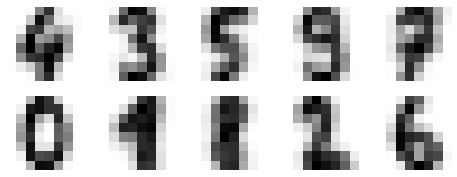

In [6]:
# We see that even without labels, KMeans can find clusters with identifiable numbers at the center, possibly with the exception of 1 and 8.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [8]:
# matching each learning cluster label with the real label found in it:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [9]:
# We can check the accuracy of finding similar figures in the data by unsupervised clustering.
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

3. Algorithm run ：
4. Display in graph and plots ：

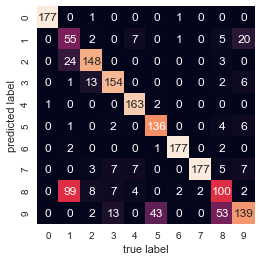

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

5. Discussion of the images in the graphs and plots ：
As we might expect, the main point of confusion in our previous visualized cluster centers was between 8 and 8. But it still shows that with k-means, we can basically build a digital classifier without referring to any known tags. 

6. Bibliography： 
 Jake VanderPlas, “Python Data Science Handbook”, O'Reilly Media, 2016